# Importing modules and data

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import regularizers
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import os
import numpy as np

In [1]:
import cv2
import imghdr

In [3]:
data_dir = 'data'

In [4]:
img = cv2.imread(os.path.join(data_dir, 'good','apo_good_2.jpg'))

In [5]:
print(img.shape)
print(img.min())

(364, 512, 3)
11


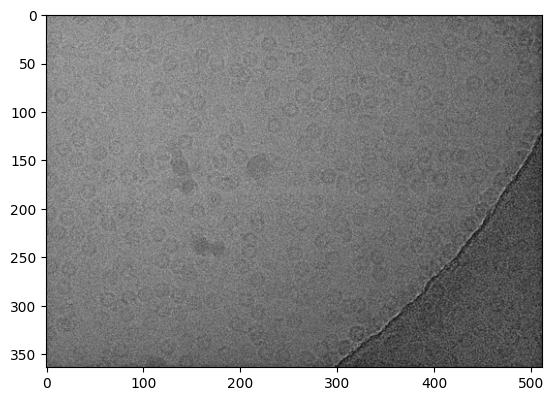

In [6]:
plt.imshow(img)

In [7]:
data = keras.utils.image_dataset_from_directory('data')

Found 1078 files belonging to 2 classes.


In [8]:
for x in data:
    print(x[0].shape)

(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(22, 256, 256, 3)


# Summary

In this note book we are initialising and training an image classifer using keras and tensorflow to classify cryo-EM images. The two classes we are using are "good" images for use in further processing and "bad" images that have ice contamination.

I build a sequential image classifier by utilizing the ResNet-50 architecture as a feature extractor. The pre-trained ResNet-50 model, loaded with ImageNet weights, helps capture intricate image features. To customize it for my binary classification task, I add a flatten layer to reshape the extracted features and stack three fully connected layers. The first two dense layers have ReLU activation and L2 regularization to enhance generalization. The final dense layer uses sigmoid activation for binary classification. I opt for the Adam optimizer and binary cross-entropy loss to train the model efficiently and achieve accurate predictions.

# Prepare and visualise data

In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
batch[0].shape

(32, 256, 256, 3)

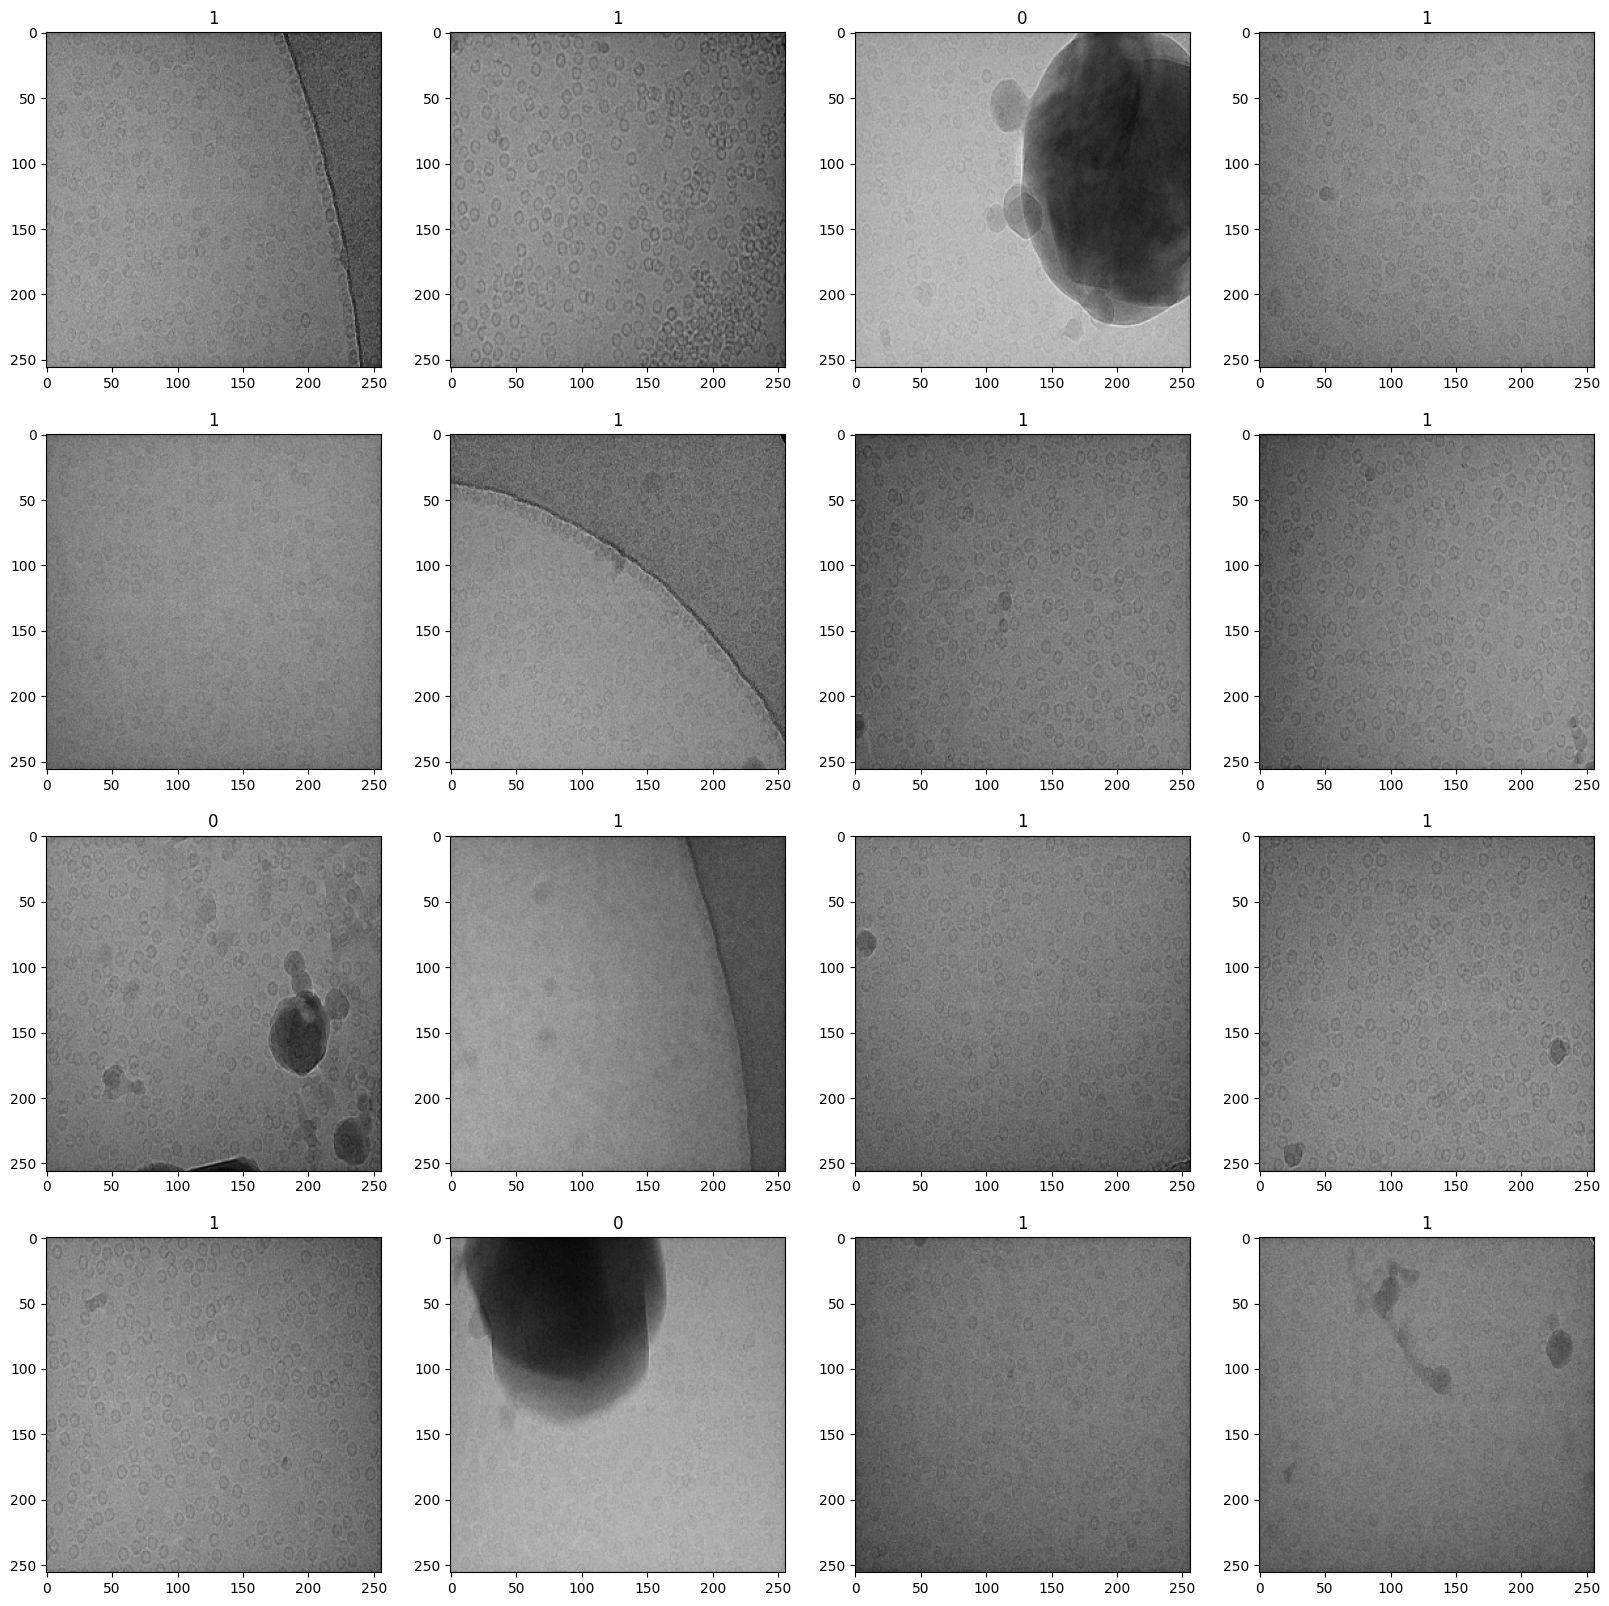

In [13]:
# Good images are labellled with a 1 and bad images are labelled with a 0, displayed 
# above the image in the below visualisation

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for row in range(4):
    for col in range(4):
        index = row * 4 + col 
        ax[row, col].imshow(batch[0][index]/255)
        ax[row, col].set_title(batch[1][index])


## Split data into train, validation and test sets 

In [14]:
len(data)

34

In [15]:
train_size = 28
val_size = 3
test_size = 3

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [17]:
for x in train:
    print(x[0].shape)

(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)


In [18]:
for x in val:
    print(x[0].shape)

(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)


In [19]:
for x in test:
    print(x[0].shape)

(32, 256, 256, 3)
(32, 256, 256, 3)
(22, 256, 256, 3)


# Initialise and compile the model

In [21]:
model = Sequential()

In [26]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [27]:

for layer in resnet_model.layers:
    layer.trainable = False


model.add(resnet_model)

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 256)               33554688  
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 57,158,913
Trainable params: 33,571,201
Non-trainable params: 23,587,712
_________________________________________________________________


# Train the model and assess performance

In [32]:
hist = model.fit(train, epochs=40, validation_data=val)

Epoch 1/40
28/28 [==============================] - 93s 3s/step - loss: 8.9706 - accuracy: 0.8460 - val_loss: 7.4516 - val_accuracy: 0.8438
Epoch 2/40
28/28 [==============================] - 93s 3s/step - loss: 5.5425 - accuracy: 0.9107 - val_loss: 5.7300 - val_accuracy: 0.8333
Epoch 3/40
28/28 [==============================] - 87s 3s/step - loss: 3.5239 - accuracy: 0.9643 - val_loss: 2.8018 - val_accuracy: 0.9792
Epoch 4/40
28/28 [==============================] - 92s 3s/step - loss: 2.4858 - accuracy: 0.9754 - val_loss: 2.0439 - val_accuracy: 0.9896
Epoch 5/40
28/28 [==============================] - 78s 3s/step - loss: 1.8836 - accuracy: 0.9788 - val_loss: 2.3944 - val_accuracy: 0.9062
Epoch 6/40
28/28 [==============================] - 80s 3s/step - loss: 1.7304 - accuracy: 0.9565 - val_loss: 2.0867 - val_accuracy: 0.9375
Epoch 7/40
28/28 [==============================] - 90s 3s/step - loss: 1.5909 - accuracy: 0.9743 - val_loss: 1.4282 - val_accuracy: 0.9792
Epoch 8/40
28/28 [==

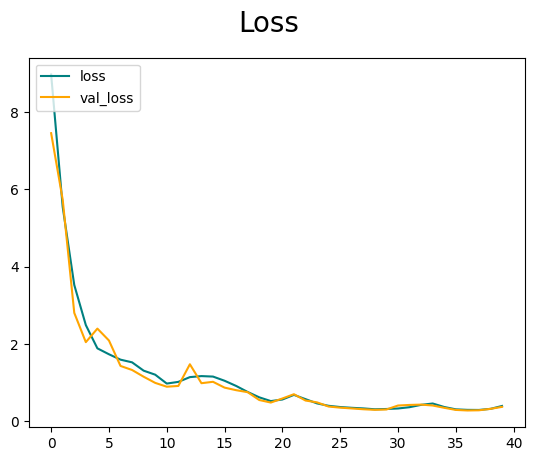

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

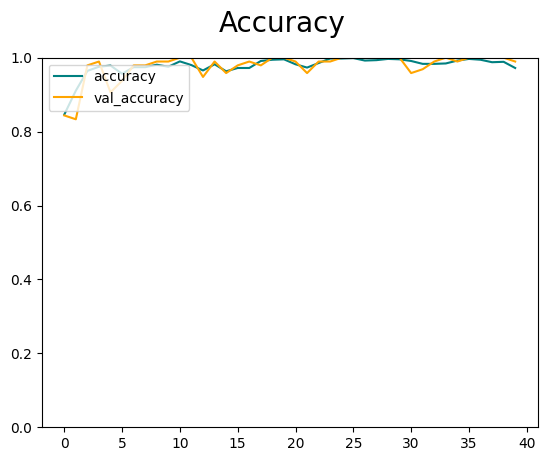

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.ylim([0, 1])
plt.legend(loc="upper left")
plt.show()

# Apply trained model to the test data and asssess performance

In [35]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    print(X.shape)
    yhats = model.predict(X)
    for x in range(len(yhats)):
        if yhats[x] >= 0.5:
            yhats[x] = 1
        else:
            yhats[x] = 0
    pre.update_state(y, yhats)
    re.update_state(y, yhats)
    acc.update_state(y, yhats)

(32, 256, 256, 3)
1/1 [==============================] - 4s 4s/step
(32, 256, 256, 3)
1/1 [==============================] - 2s 2s/step
(22, 256, 256, 3)
1/1 [==============================] - 2s 2s/step


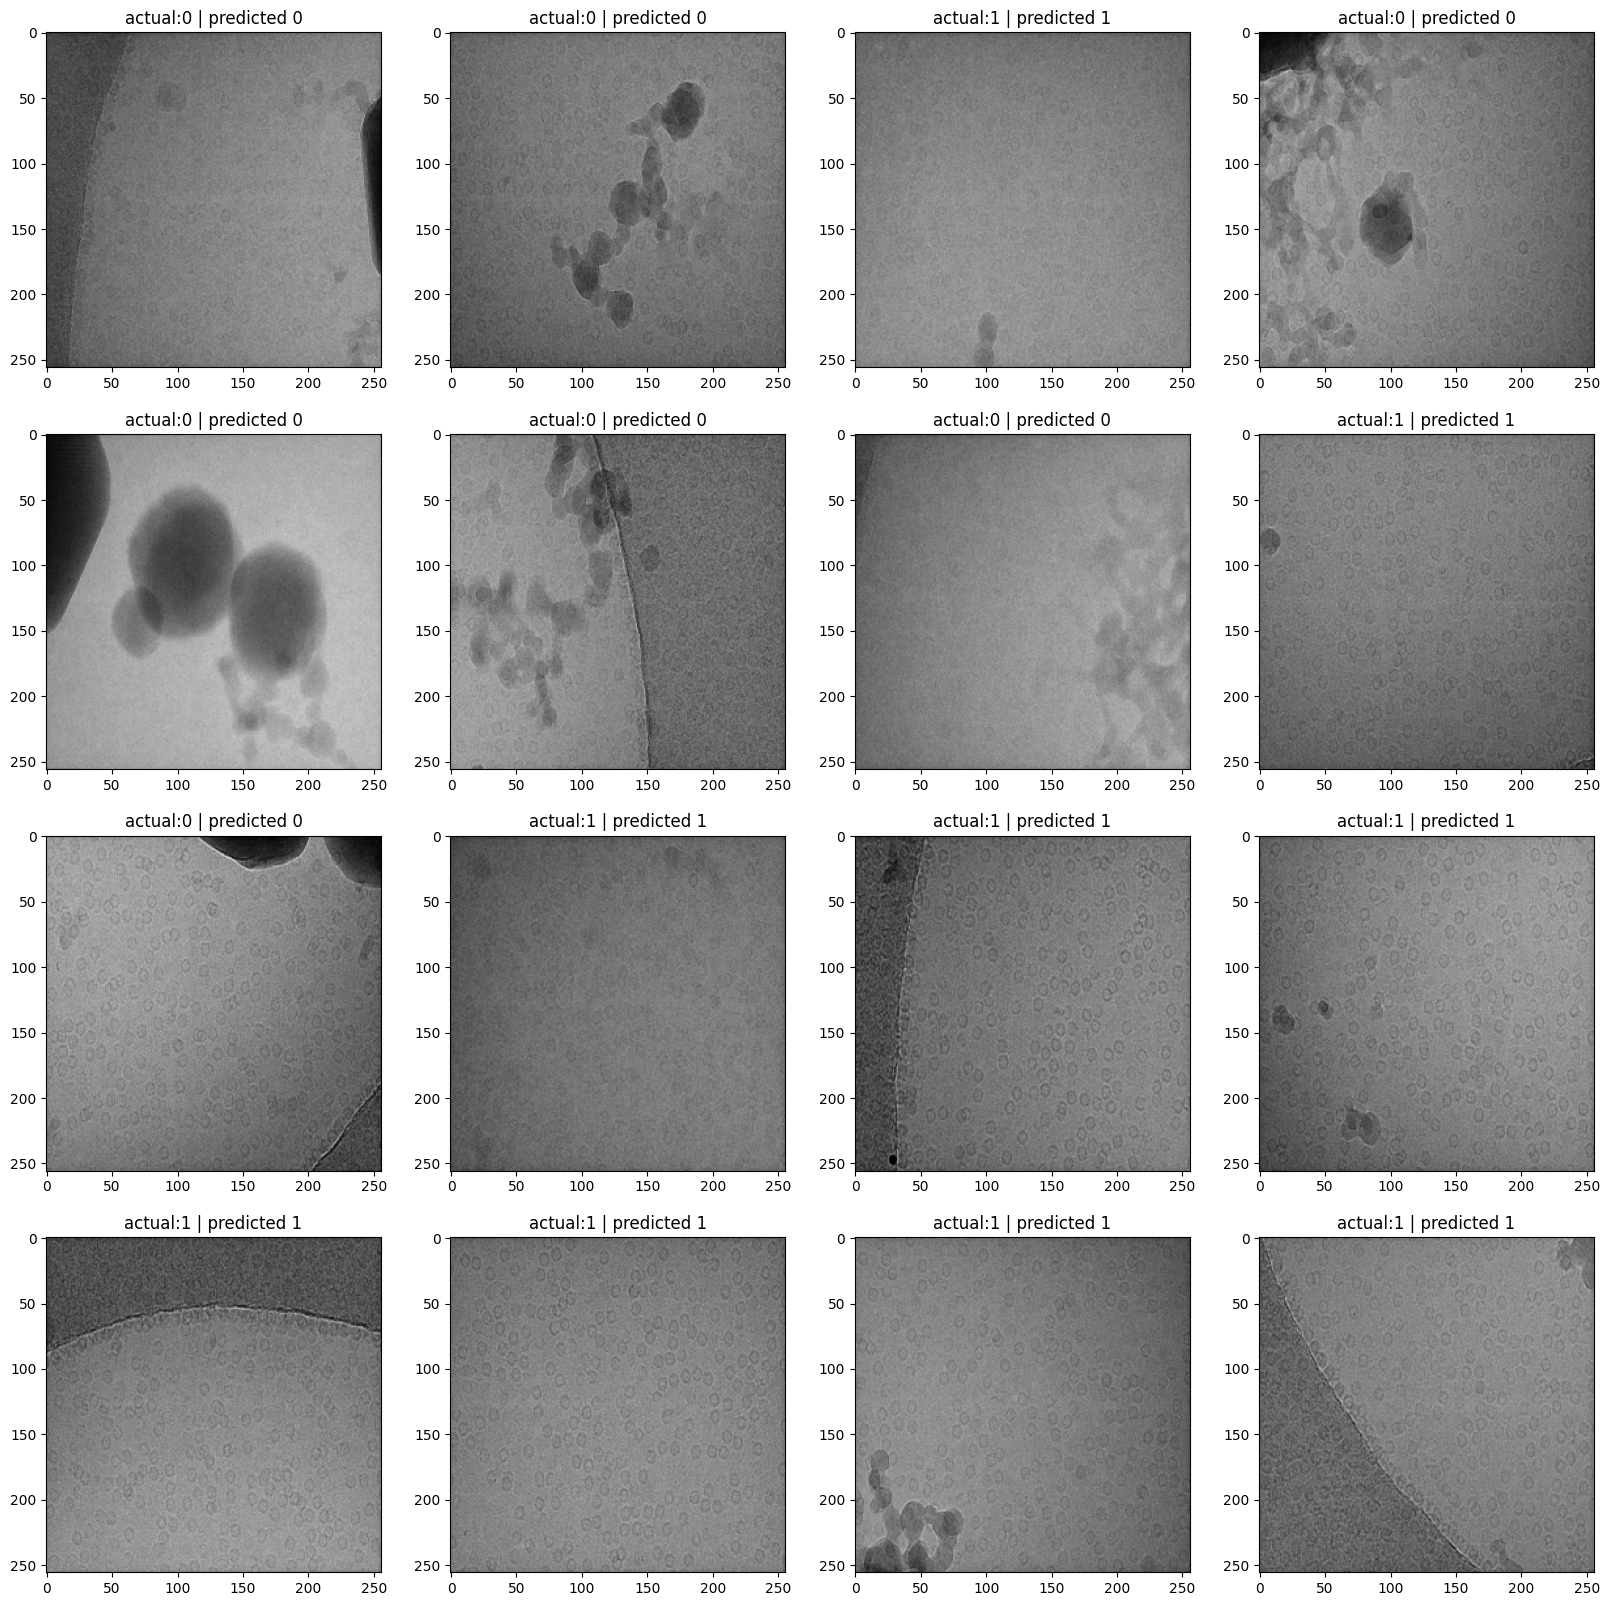

In [38]:
# Visualise the test data and compare the predicted label to the actual label

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for row in range(4):
    for col in range(4):
        index = row * 4 + col 
        ax[row, col].imshow(batch[0][index]/255)
        ax[row, col].set_title(f'actual:{y[index]} | predicted {int(yhats[index][0])}')


In [5]:
print(f'Precision:{pre.result()}, Recall:{re.result()}, Accuracy:{acc.result()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# Save model

In [89]:
model.save(os.path.join('models', 'contamination_detector_model.h5'))